<a href="https://colab.research.google.com/github/Austine9209/Weather-Data-Analysis/blob/main/Weather_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [4]:
! kaggle datasets download ayushmi77al/weather-data-set-for-beginners

Dataset URL: https://www.kaggle.com/datasets/ayushmi77al/weather-data-set-for-beginners
License(s): unknown
100% 101k/101k [00:00<00:00, 509kB/s]
100% 101k/101k [00:00<00:00, 507kB/s]


In [5]:
!unzip /content/weather-data-set-for-beginners.zip

Archive:  /content/weather-data-set-for-beginners.zip
  inflating: 1. Weather Data.csv     


In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [9]:
#Load dataset
df = pd.read_csv("1. Weather Data.csv")

In [11]:
# Key characteristics of the dataset
print("Number of records:", df.shape[0])
print("Number of features:", df.shape[1])
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

Number of records: 8784
Number of features: 8

Data types:
 Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

Summary statistics:
             Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784

In [12]:
# Identifing missing or null values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [13]:
# Checking for duplicate records
print("\nNumber of duplicate records:", df.duplicated().sum())


Number of duplicate records: 0


In [14]:
# Statistical Summary for Numerical Features
numerical_features = df.select_dtypes(include=['float', 'int']).columns
summary_stats = df[numerical_features].describe()
print(summary_stats)

            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


In [15]:
# Identifying Outliers using Z-scores
for feature in numerical_features:
  df[feature + '_zscore'] = zscore(df[feature])
  outliers = df[(df[feature + '_zscore'] > 3) | (df[feature + '_zscore'] < -3)]
  if not outliers.empty:
    print(f"\nOutliers in {feature}:\n", outliers)


Outliers in Wind Speed_km/h:
              Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
33       1/2/2012 9:00     1.8              -3.7         67               44   
34      1/2/2012 10:00     1.5              -4.1         66               43   
36      1/2/2012 12:00     1.7              -6.2         56               48   
409     1/18/2012 1:00     3.7              -2.1         66               83   
410     1/18/2012 2:00     0.5              -4.0         72               70   
...                ...     ...               ...        ...              ...   
8538  12/21/2012 18:00     1.4               0.3         92               46   
8669   12/27/2012 5:00    -7.5              -9.1         88               43   
8671   12/27/2012 7:00    -6.5              -7.6         92               44   
8677  12/27/2012 13:00    -5.4              -6.7         91               48   
8678  12/27/2012 14:00    -5.2              -6.7         89               46   

      Vi

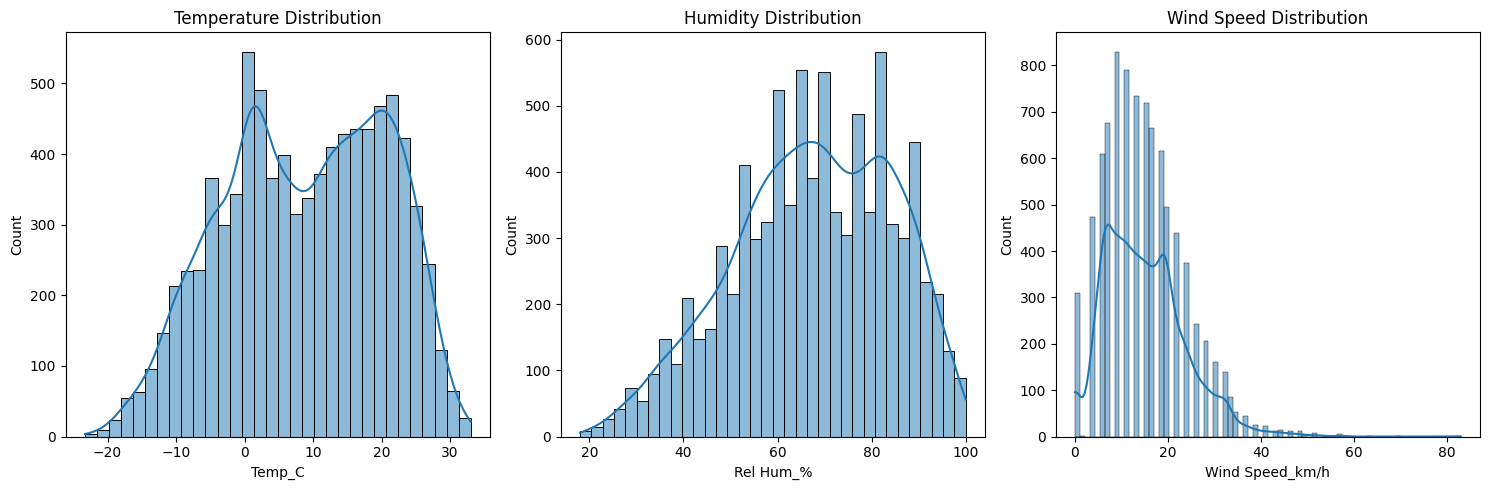

In [17]:
# Distribution of Weather Parameters
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Temp_C'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Rel Hum_%'], kde=True)
plt.title('Humidity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Wind Speed_km/h'], kde=True)
plt.title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

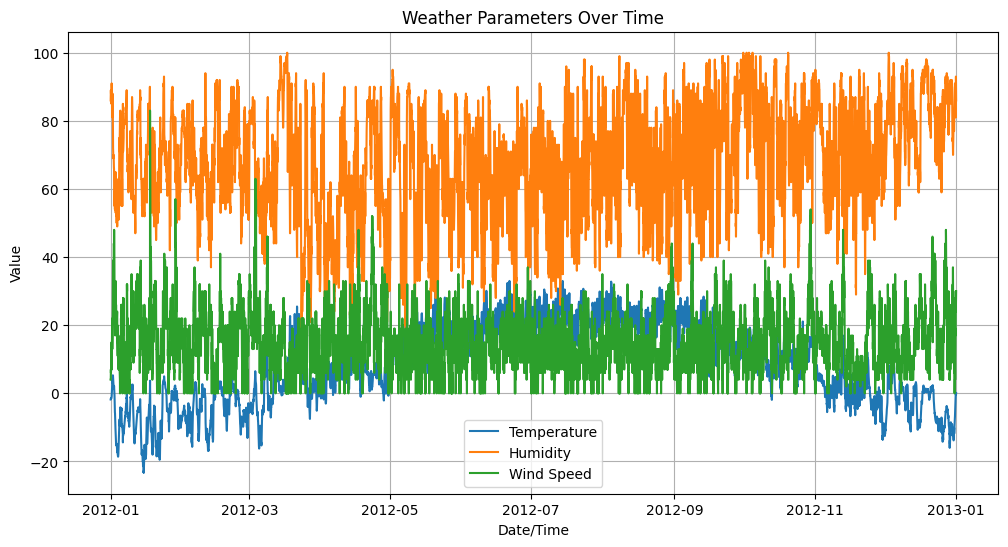

In [18]:
# Time Series Visualization
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Temp_C'], label='Temperature')
plt.plot(df['Rel Hum_%'], label='Humidity')
plt.plot(df['Wind Speed_km/h'], label='Wind Speed')
plt.title('Weather Parameters Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

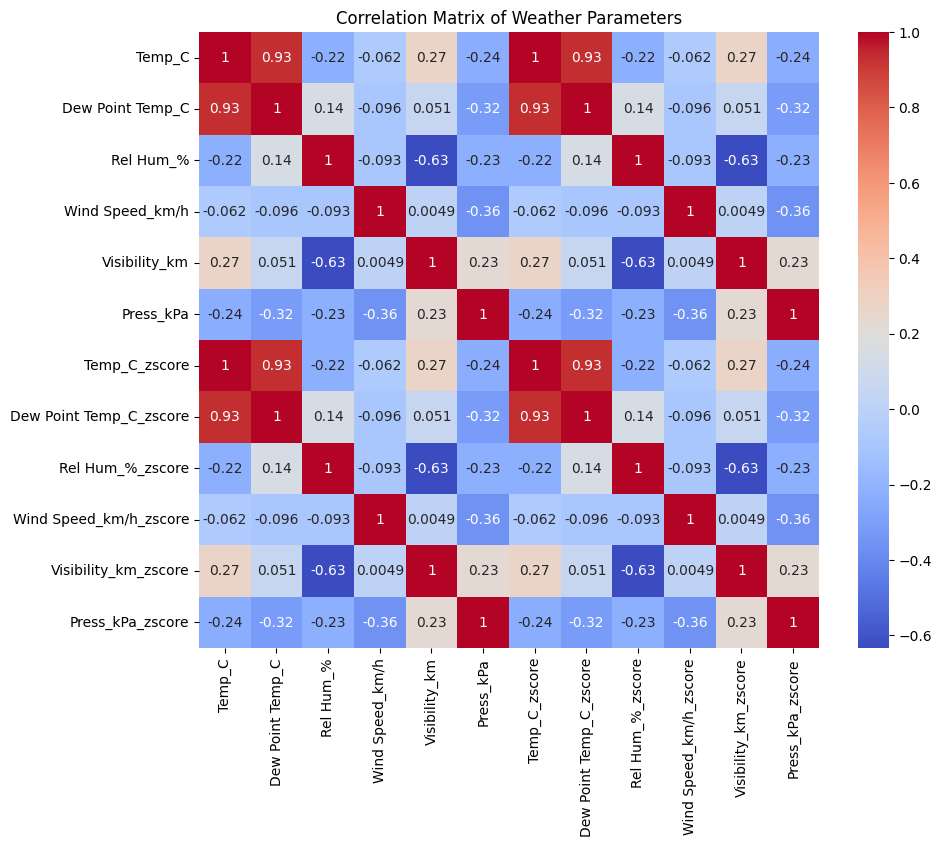

In [20]:
# Correlation Matrix and Heatmap
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float', 'int'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

In [21]:
# Extract month and season from the 'Date/Time' column
df['Month'] = df.index.month
df['Season'] = (df.index.month % 12 + 3) // 3  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

In [22]:
# Group data by month and calculate average temperature and humidity
monthly_avg = df.groupby('Month')[['Temp_C', 'Rel Hum_%']].mean()

# Group data by season and calculate average temperature and humidity
seasonal_avg = df.groupby('Season')[['Temp_C', 'Rel Hum_%']].mean()

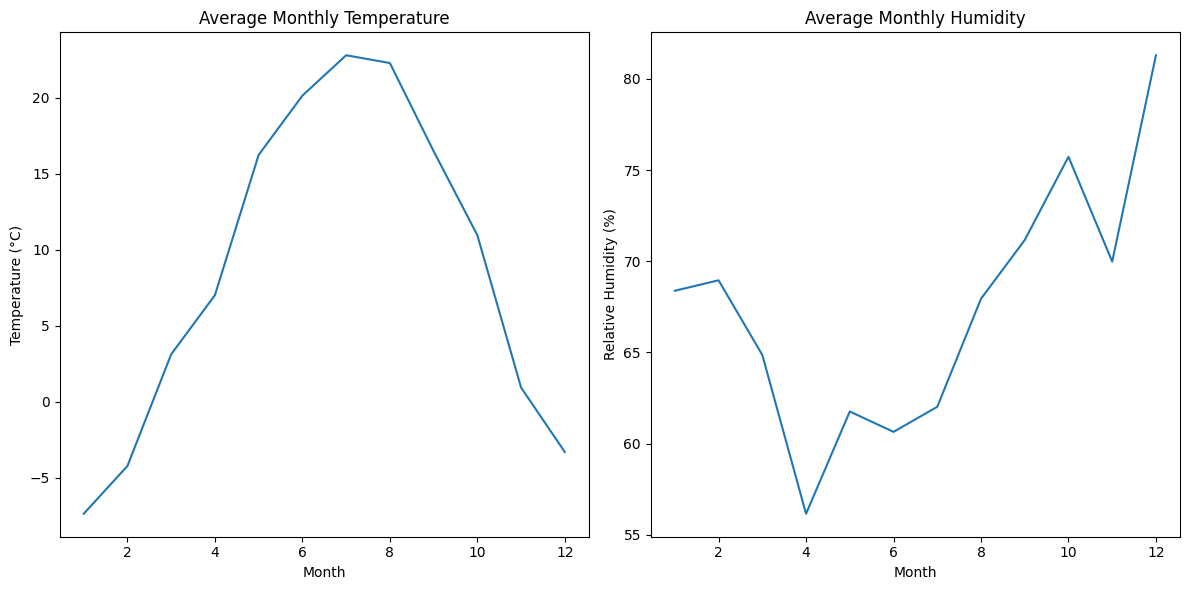

In [23]:
# Plotting monthly trends
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(monthly_avg['Temp_C'])
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.subplot(1, 2, 2)
plt.plot(monthly_avg['Rel Hum_%'])
plt.title('Average Monthly Humidity')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

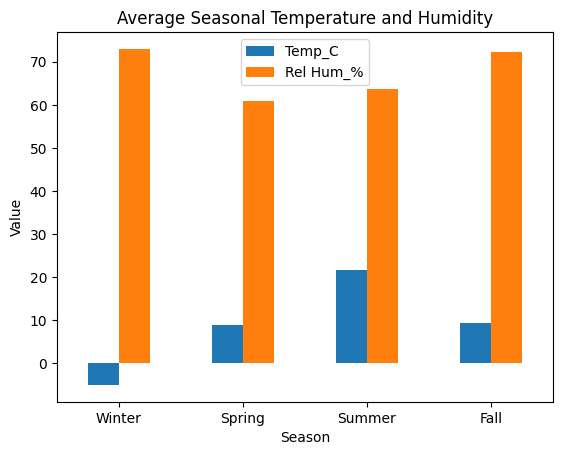

In [24]:
# Plotting seasonal trends
plt.figure(figsize=(10, 5))
seasonal_avg[['Temp_C', 'Rel Hum_%']].plot(kind='bar')
plt.title('Average Seasonal Temperature and Humidity')
plt.xlabel('Season')
plt.ylabel('Value')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'], rotation=0)
plt.legend()
plt.show()

In [25]:
# Investigating anomalies (example: sudden temperature drops)
temp_changes = df['Temp_C'].diff()
anomalies = df[temp_changes.abs() > 10]  # Adjust threshold as needed

if not anomalies.empty:
  print("\nPotential temperature anomalies:\n", anomalies)
  # Further investigation might involve checking weather records for those dates
  # to see if there were any unusual weather events.
else:
  print("\nNo significant temperature anomalies detected.")


Potential temperature anomalies:
                      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-07-23 17:00:00    19.4              18.2         93                4   

                     Visibility_km  Press_kPa             Weather  \
Date/Time                                                           
2012-07-23 17:00:00           24.1     100.24  Thunderstorms,Rain   

                     Temp_C_zscore  Dew Point Temp_C_zscore  Rel Hum_%_zscore  \
Date/Time                                                                       
2012-07-23 17:00:00       0.907133                 1.437608          1.511315   

                     Wind Speed_km/h_zscore  Visibility_km_zscore  \
Date/Time                                                           
2012-07-23 17:00:00               -1.259808               -0.2824   

                     Press_kPa_zscore  Month  Season  
Date/Time         